In [2]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial
import pandas as pd
import matplotlib.pyplot as plt
import pysindy as ps
import glob
from scipy.integrate import solve_ivp
from scipy.signal import savgol_filter
import os
from sklearn.metrics import r2_score

# Import data

In [17]:
def import_dfs():
    # Path to the folder containing CSV files
    folder_path = '../dados'

    # Get a list of all CSV files in the folder
    csv_files = glob.glob(os.path.join(folder_path, '5*.csv'))

    # Initialize an empty list to hold dataframes
    data_frames = []

    # Read the first CSV file to establish the schema
    first_file = csv_files[0]
    first_df = pd.read_csv(first_file)
    schema = first_df.columns

    # Append the first dataframe to the list
    data_frames.append(first_df)

    # Load each remaining CSV file, reorder columns, and append to the list
    for file in csv_files[1:]:
        df = pd.read_csv(file)  
        df = df[schema]  # Reorder columns to match the schema
        data_frames.append(df)
    
    data_frames.append(pd.read_csv('../dados/nh60ab80.csv'))
    return data_frames
data_frames = import_dfs()
print(len(data_frames))

12


# Finding the optimal timespan crop

In [18]:
def count_points(listdf):
    count = 0
    for df in listdf:
        count += len(df)
    print(f'{len(data_frames)} -> {count}')
    return count

with t_max = 5.0
datasets count after timespan filter:
12 -> 129
datasets count after scale drop:
12 -> 21
with t_max = 10.0
datasets count after timespan filter:
12 -> 129
datasets count after scale drop:
12 -> 29
with t_max = 15.0
datasets count after timespan filter:
12 -> 129
datasets count after scale drop:
12 -> 37
with t_max = 20.0
datasets count after timespan filter:
12 -> 129
datasets count after scale drop:
12 -> 45
with t_max = 25.0
datasets count after timespan filter:
12 -> 129
datasets count after scale drop:
12 -> 46
with t_max = 30.0
datasets count after timespan filter:
12 -> 129
datasets count after scale drop:
12 -> 53
with t_max = 32.0
datasets count after timespan filter:
12 -> 129
datasets count after scale drop:
12 -> 55
with t_max = 40.0
datasets count after timespan filter:
12 -> 129
datasets count after scale drop:
12 -> 59
with t_max = 45.0
datasets count after timespan filter:
12 -> 129
datasets count after scale drop:
12 -> 60
with t_max = 50.0
datasets co

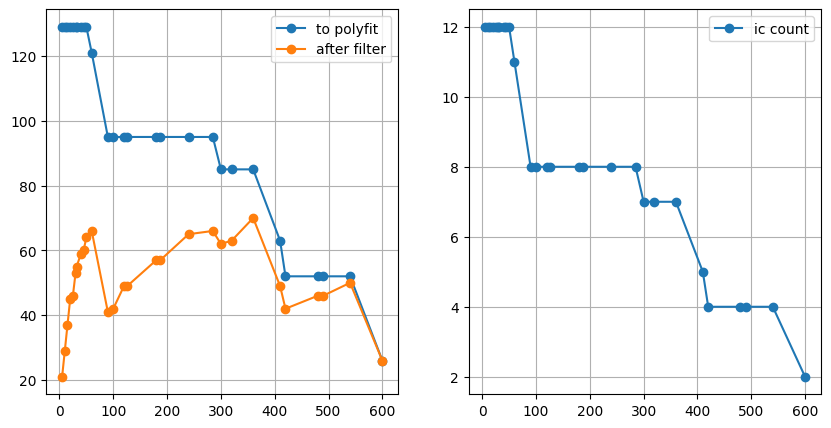

In [19]:
all_t = [5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 32.0, 40.0, 45.0, 50.0, 60.0, 90.0, 100.0, 120.0, 126.0, 180.0, 187.5, 240.0, 285.0, 300.0, 320.0, 360.0, 410.0, 420.0, 480.0, 490.0, 540.0, 600.0]
all_f = []
all_inter = []
all_ic = []
for t in all_t:
    print('with t_max =',t)
    data_frames = import_dfs()
    print(f'datasets count after timespan filter:')
    data_frames = [df for df in data_frames if (df['apa_t'].iloc[-1] >= t)]
    all_inter.append(count_points(data_frames))
    print(f'datasets count after scale drop:')
    filtered_dfs = []
    for df in data_frames:
        filtered_dfs.append(pd.DataFrame(df.loc[df.apa_t <= t]))
    data_frames = filtered_dfs
    all_f.append(count_points(data_frames))
    all_ic.append(len(data_frames))
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(all_t,all_inter,'-o',label='to polyfit')
ax[0].plot(all_t,all_f,'-o',label='after filter')
ax[1].plot(all_t,all_ic,'-o',label='ic count')
ax[0].legend()
ax[1].legend()
ax[0].grid()
ax[1].grid()

## Crop ideal: 240 min

In [20]:
t_max = 600
data_frames = import_dfs()
print(f'datasets count:')
count_points(data_frames)

data_frames = [df for df in data_frames if (df['apa_t'].iloc[-1] <= t_max)]

print(f'datasets count after timespan filter:')
count_points(data_frames)

for i in data_frames:
    print(i.apa_t.to_numpy())


datasets count:
12 -> 129
datasets count after timespan filter:
12 -> 129
[  0.   5.  15.  20.  25.  60. 120. 180. 240. 300. 360. 420. 480. 540.
 600.]
[  0.   5.  15.  30.  60. 120. 180. 240. 300. 360. 420. 480. 540.]
[  0.   5.  15.  30.  60. 120. 180. 240. 300. 360. 420. 480. 540.]
[  0.   5.  10.  15.  20.  30.  60. 100. 180. 240. 300. 360.]
[ 0.  5. 10. 15. 20. 30. 40. 50.]
[ 0.  5. 10. 20. 30. 40. 50. 60.]
[ 0.  5. 10. 15. 20. 32. 40. 50. 60.]
[  0.   5.  10.  15.  60. 120. 180. 240. 320. 360.]
[ 0.  5. 10. 15. 20. 32. 40. 50. 60.]
[  0.  10.  20.  30.  60. 120. 180. 240. 300. 360. 410.]
[  0.  10.  20.  30.  45.  90. 120. 180. 240. 285.]
[  0.  60. 120. 180. 240. 300. 360. 420. 480. 540. 600.]


# Fitting data to polynomial

In [21]:
def fit_data(t,x,deg,smooth=False,window_length=5,polyorder=3,plot=True):
    weights = np.ones_like(t)
    weights[0] = 10 
    if smooth:

        smoothed_values = savgol_filter(x, window_length, polyorder)

        coeffs = np.polyfit(t, smoothed_values, deg,w =weights)
    else:
        coeffs = np.polyfit(t, x, deg)
    
    p = Polynomial(coeffs[::-1])
    
    r2 = r2_score(p(t),x)
    
    if plot:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.scatter(t, x, color='red', label='Original Data Points')
        if smooth:
            plt.plot(t,smoothed_values,'.k')
        plt.plot(np.linspace(0,t[-1],201), p(np.linspace(0,t[-1],201)), label='Polynomial Fit')
        plt.title(f'Poly fit w={window_length} p={polyorder} R = {r2}')
        plt.legend()
    return r2,coeffs
'''
for i in range(len(data_frames)):
    fit_data(data_frames[i].iloc[:,0].to_numpy(),data_frames[i].iloc[:,1].to_numpy(),deg=4,smooth=True,window_length=3,polyorder=2)
    plt.savefig(f'polyfit/exp{i}w3,p2')
    fit_data(data_frames[i].iloc[:,0].to_numpy(),data_frames[i].iloc[:,1].to_numpy(),deg=4,smooth=True,window_length=5,polyorder=3)
    plt.savefig(f'polyfit/exp{i}w5p3')
    fit_data(data_frames[i].iloc[:,0].to_numpy(),data_frames[i].iloc[:,1].to_numpy(),deg=4,smooth=True,window_length=7,polyorder=3)
    plt.savefig(f'polyfit/exp{i}w7p3')
''';

## Finding optimal parameter for polyfit

no, deg=2 0.8690232912546149
no, deg=3 0.9759974901831608
no, deg=4 0.9841677526998946
no, deg=5 0.9875636699354917


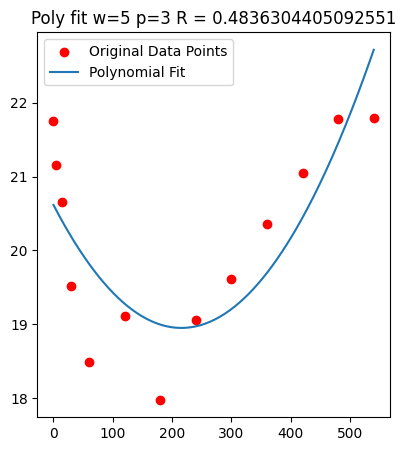

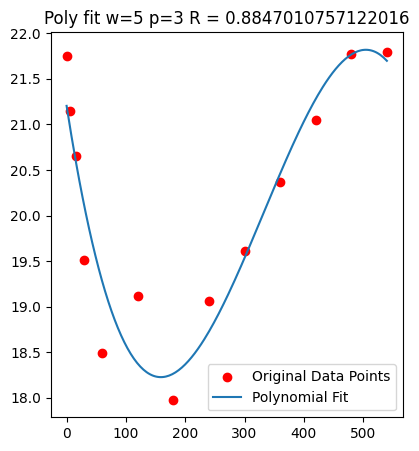

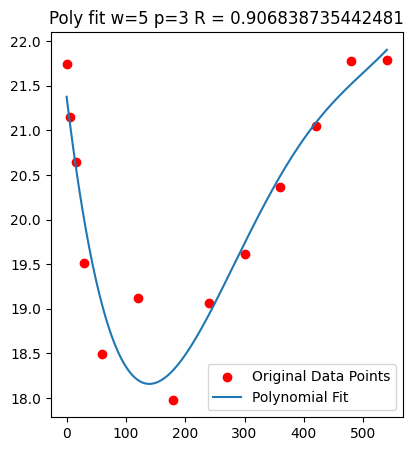

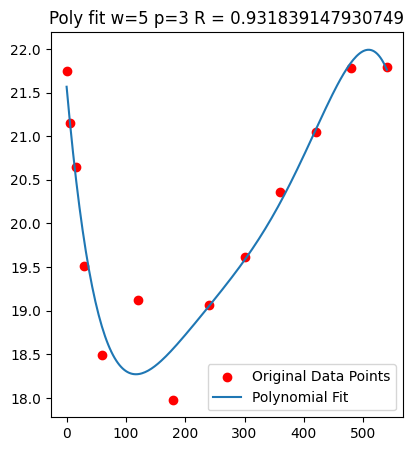

In [25]:
hyperpar = [(3,2),(5,3),(7,3),(7,5),]#(10,3),(10,5)]
deg = [2,3,4,5]
all_r2 = []
all_r2_mean = []
labels = []
mean_labels = []
for d in deg:
    r2_mean = []
    for df in data_frames:
        r2,_ = fit_data(df.iloc[:,0].to_numpy(),df.iloc[:,1].to_numpy(),deg=d,smooth=False,plot=False)
        all_r2.append(r2)
        r2_mean.append(r2)
        labels.append(f'no, deg={d}')
    r2_mean = np.mean(r2_mean)
    all_r2_mean.append(r2_mean)
    mean_labels.append(f'no, deg={d}')
    fit_data(data_frames[1].iloc[:,0].to_numpy(),data_frames[1].iloc[:,1].to_numpy(),deg=d,smooth=False,plot=True)
    print(f'no, deg={d}', r2_mean)
    
for wd in hyperpar:
    word1 = f'w{wd[0]},d{wd[1]}'
    for d in deg:
        r2_mean = []
        word2 = f'deg = {d}'
        for df in data_frames:
            r2,_ = fit_data(df.iloc[:,0].to_numpy(),df.iloc[:,1].to_numpy(),deg=d,smooth=True,window_length=wd[0],polyorder=wd[1],plot=False)
            all_r2.append(r2)
            r2_mean.append(r2)
            labels.append(word1 + word2)
        r2_mean = np.mean(r2_mean)
        all_r2_mean.append(r2_mean) 
        mean_labels.append(f'{word1},{word2}')

    
        

In [24]:
meanr2 = np.sort(np.vstack((np.array(all_r2_mean),np.array(mean_labels))),axis=1)
for i in range(meanr2.shape[1]):
    print(meanr2[0,i], meanr2[1,i])

0.8690232912546149 no, deg=2
0.8701585715751068 no, deg=3
0.873552791418799 no, deg=4
0.873688259326575 no, deg=5
0.8739739497796739 w3,d2,deg = 2
0.9696674289150198 w3,d2,deg = 3
0.9717725042012054 w3,d2,deg = 4
0.9717940458622031 w3,d2,deg = 5
0.972131372976946 w5,d3,deg = 2
0.9759974901831608 w5,d3,deg = 3
0.9786460516153714 w5,d3,deg = 4
0.9814542907423189 w5,d3,deg = 5
0.981461225267862 w7,d3,deg = 2
0.9817697081625858 w7,d3,deg = 3
0.9817931566473511 w7,d3,deg = 4
0.9841677526998946 w7,d3,deg = 5
0.9858602802405999 w7,d5,deg = 2
0.9861179902175135 w7,d5,deg = 3
0.9862408083058608 w7,d5,deg = 4
0.9875636699354917 w7,d5,deg = 5


## Chosen: r2 = 0.9730776565859717 - w5,d3,deg = 4

0.9673912396727946 w3,d2,deg = 4
0.9809868409687174 w7,d3,deg = 4

# Filter data to T_max

In [26]:
filtered_dfs = []
for df in data_frames:
    filtered_dfs.append(pd.DataFrame(df.loc[df.apa_t <= t_max]))
data_frames = filtered_dfs

print(f'datasets count after scale drop:')
count_points(data_frames)
combined_data = []
combined_t = []

for df in data_frames:
    combined_data.append(df.loc[:,['apa_mm','amox_mm','aoh_mm','ester_mm']].to_numpy())
    combined_t.append(df.loc[:,'apa_t'].to_numpy())
test_set = (combined_data[0],combined_t[0])
for i in combined_t: print(i)

datasets count after scale drop:
12 -> 129
[  0.   5.  15.  20.  25.  60. 120. 180. 240. 300. 360. 420. 480. 540.
 600.]
[  0.   5.  15.  30.  60. 120. 180. 240. 300. 360. 420. 480. 540.]
[  0.   5.  15.  30.  60. 120. 180. 240. 300. 360. 420. 480. 540.]
[  0.   5.  10.  15.  20.  30.  60. 100. 180. 240. 300. 360.]
[ 0.  5. 10. 15. 20. 30. 40. 50.]
[ 0.  5. 10. 20. 30. 40. 50. 60.]
[ 0.  5. 10. 15. 20. 32. 40. 50. 60.]
[  0.   5.  10.  15.  60. 120. 180. 240. 320. 360.]
[ 0.  5. 10. 15. 20. 32. 40. 50. 60.]
[  0.  10.  20.  30.  60. 120. 180. 240. 300. 360. 410.]
[  0.  10.  20.  30.  45.  90. 120. 180. 240. 285.]
[  0.  60. 120. 180. 240. 300. 360. 420. 480. 540. 600.]


# Exporting data

301
../dados/oversampled/5.100nh40ab80.csv
271
../dados/oversampled/5.102nh20ab40.csv
271
../dados/oversampled/5.103nh40ab30.csv
181
../dados/oversampled/5.106nh100ab40.csv
26
../dados/oversampled/5.107nh55ab55.csv
31
../dados/oversampled/5.109nh5ab55.csv
31
../dados/oversampled/5.110nh10ab55.csv
181
../dados/oversampled/5.112nh78ab35.csv
31
../dados/oversampled/5.48nh20ab80.csv
206
../dados/oversampled/5.80nh12ab40.csv
143
../dados/oversampled/5.81nh5ab30.csv
301
../dados/oversampled/nh60ab80.csv


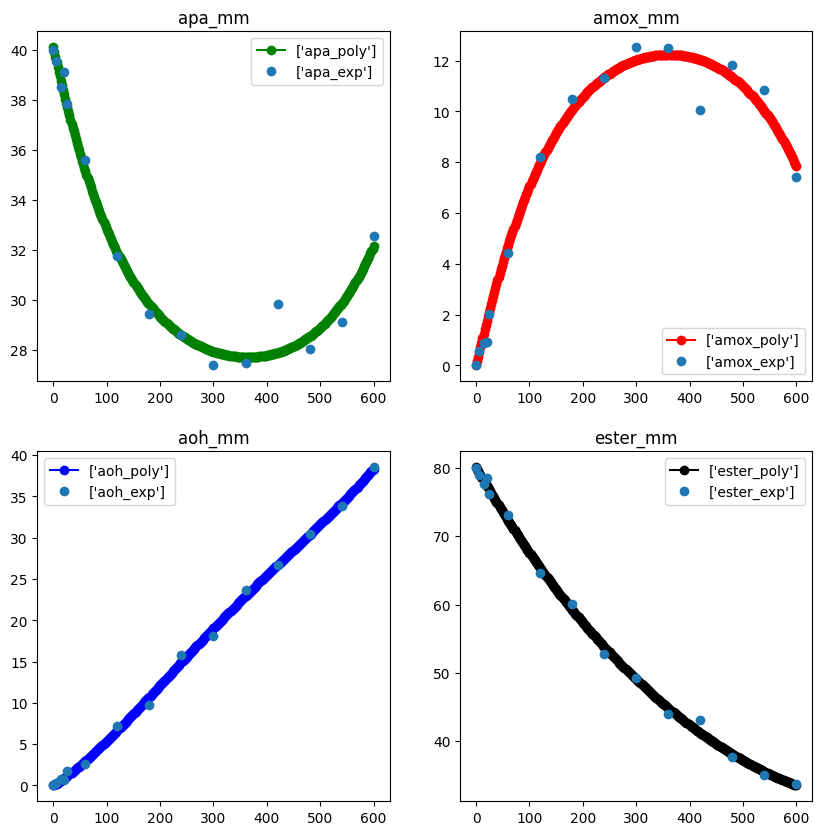

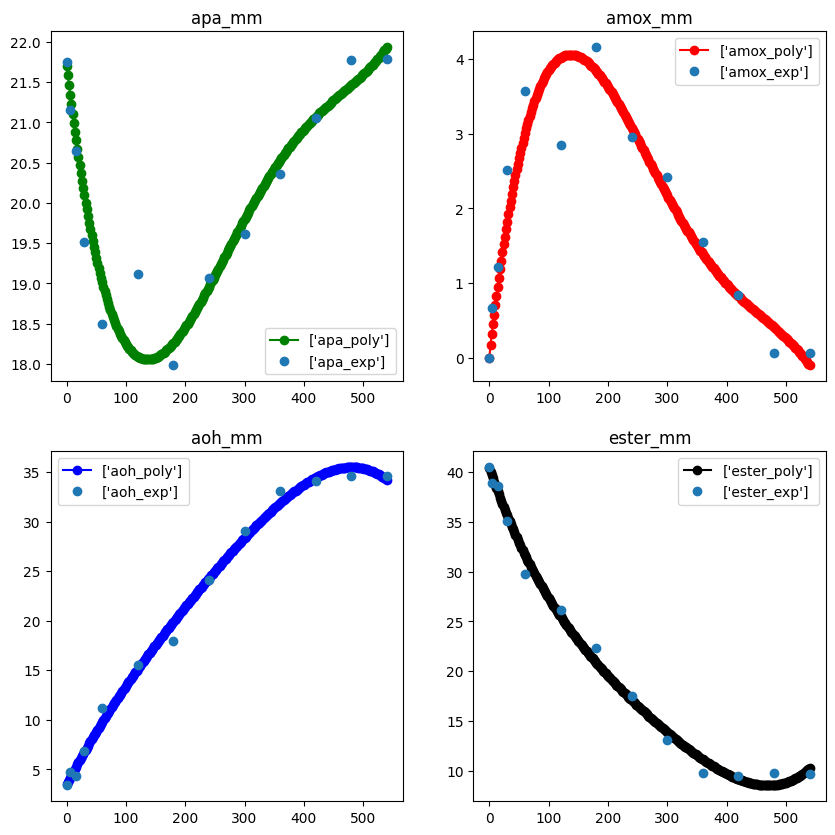

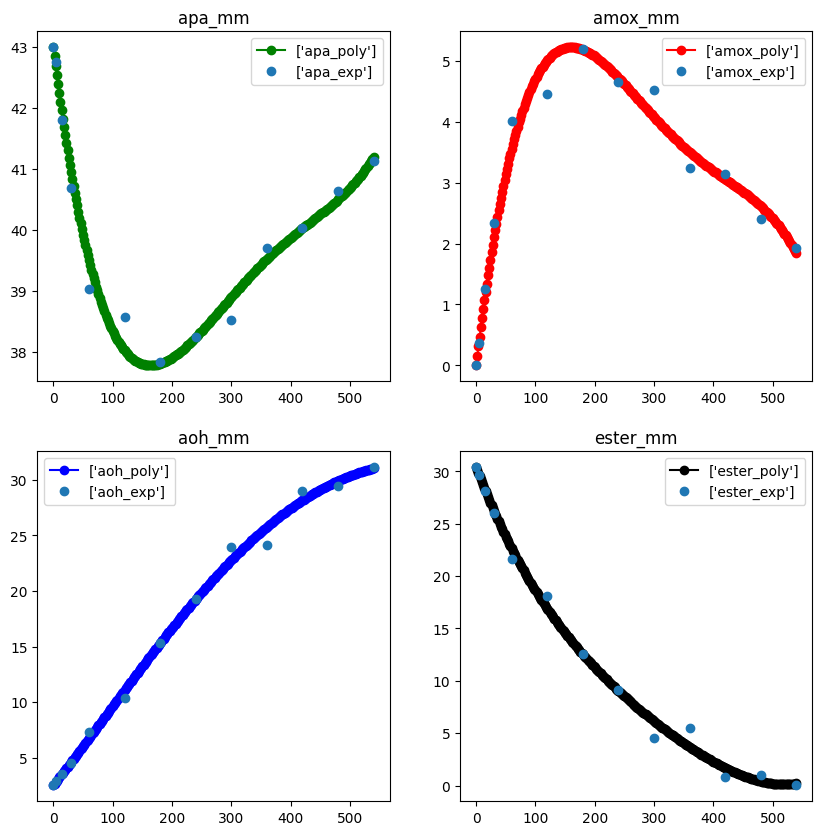

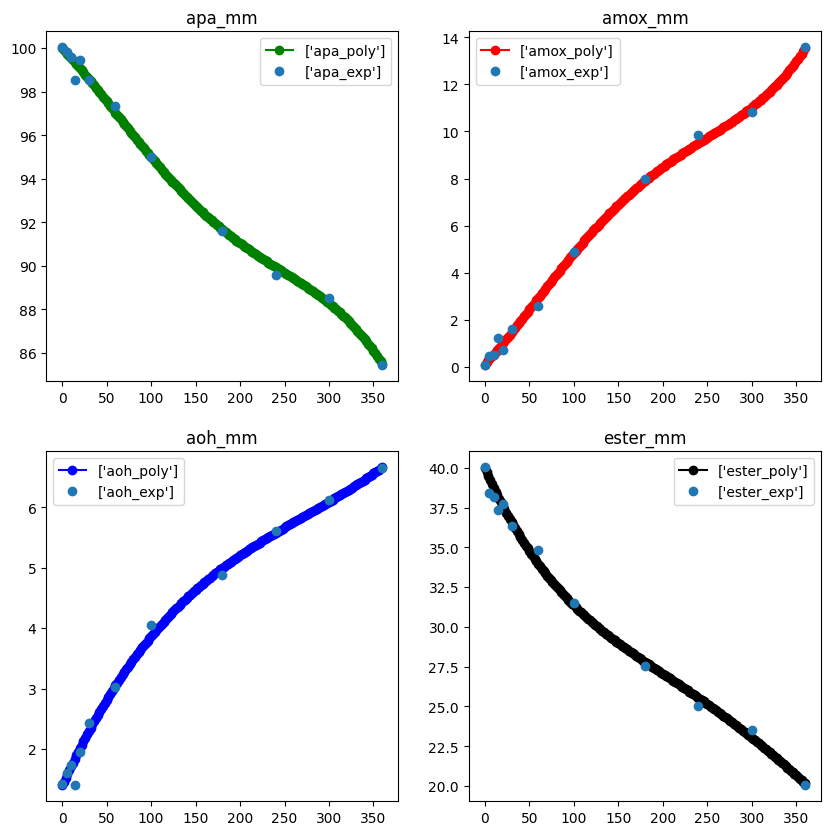

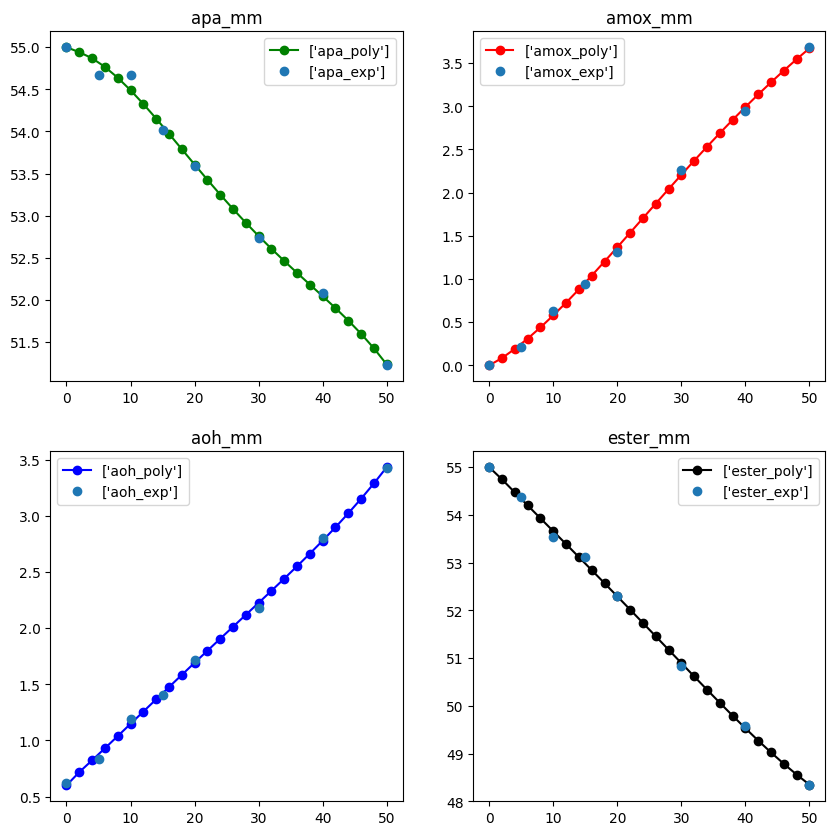

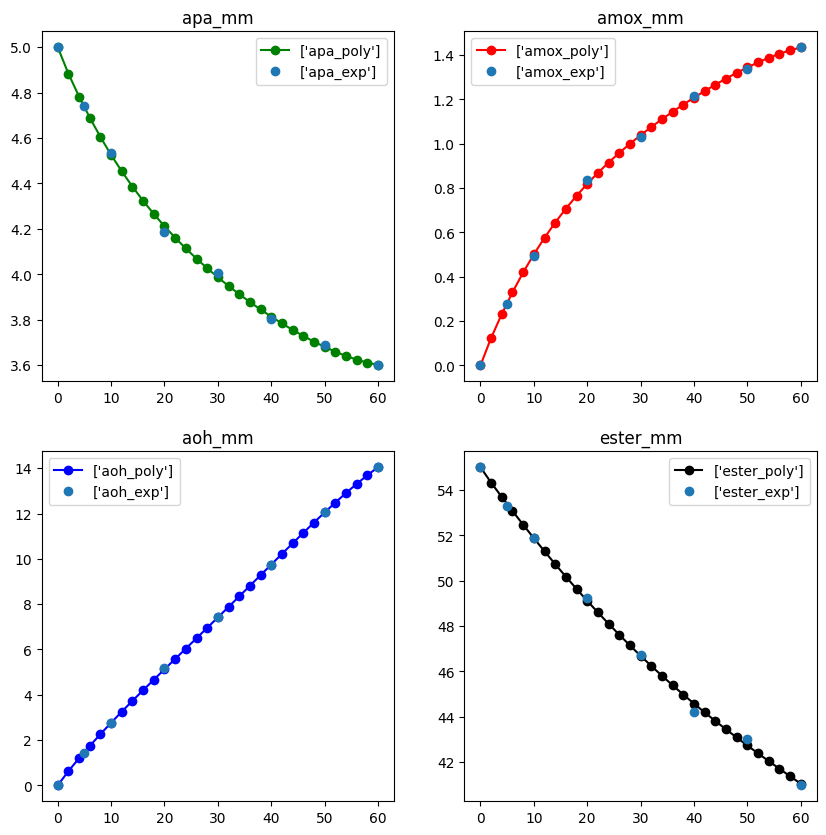

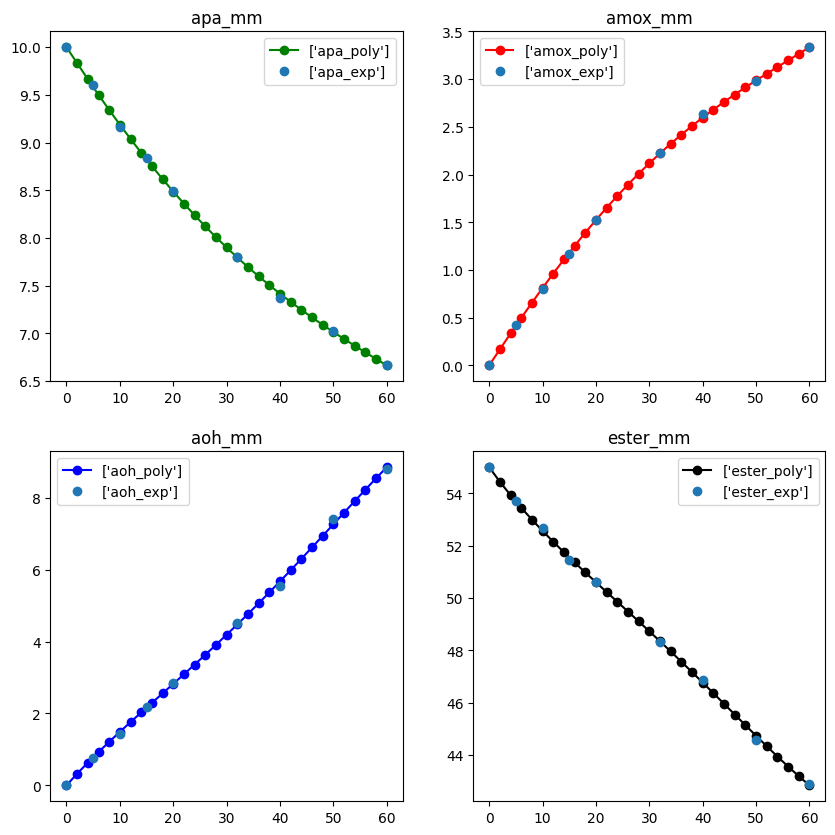

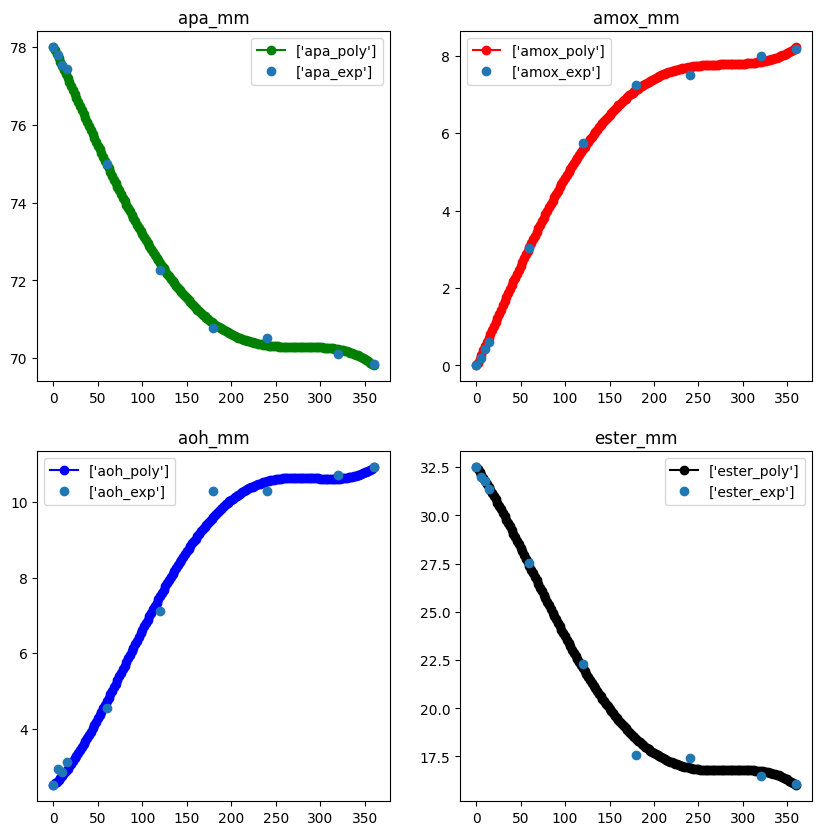

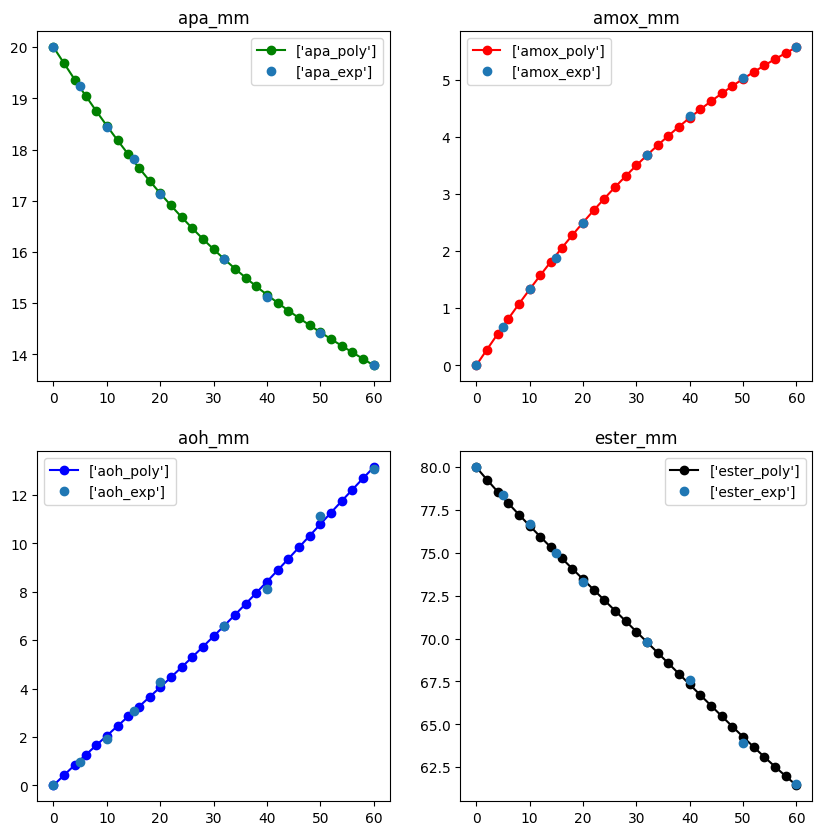

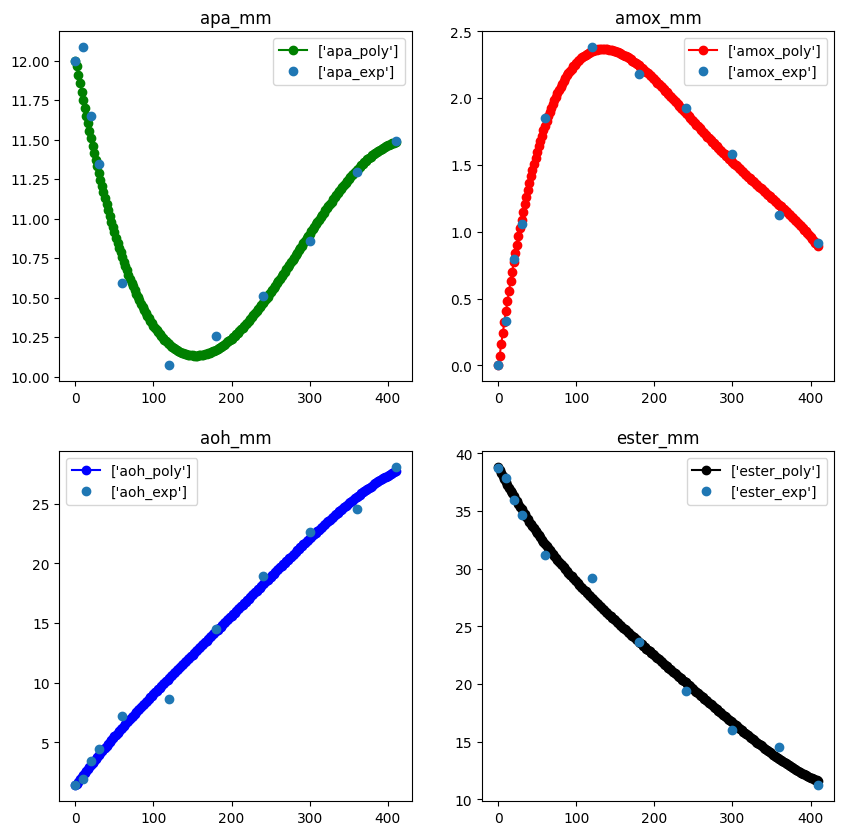

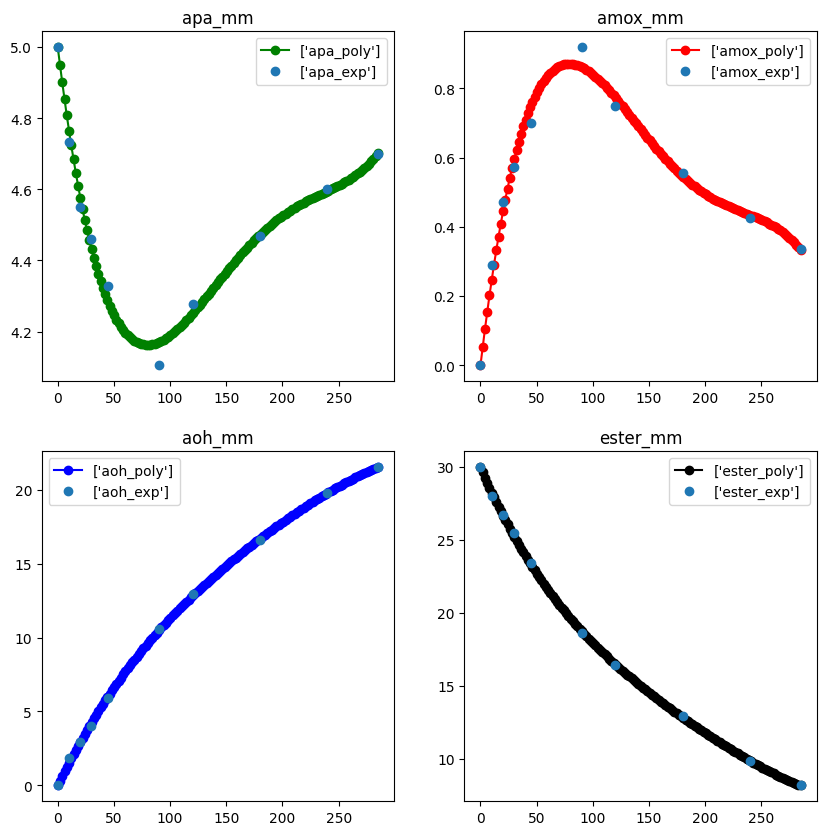

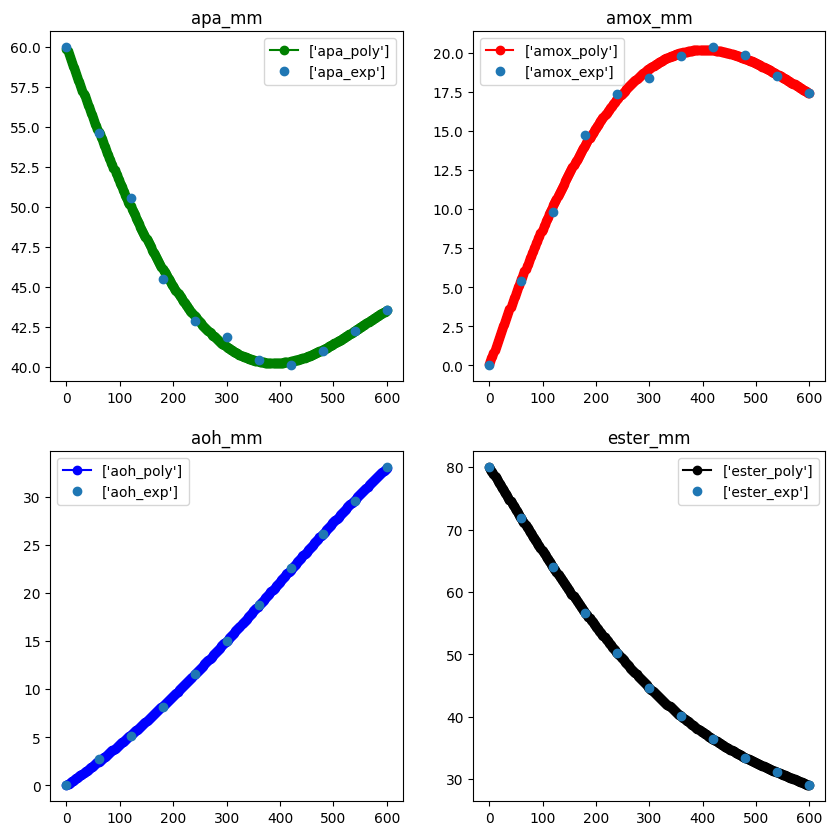

In [60]:
from scipy.interpolate import UnivariateSpline
count = 0
all_r2 = []
csv_files = glob.glob(os.path.join('../dados', '5*.csv'))
csv_files.append('nh60ab80.csv')
for dfidx,df in enumerate(data_frames):
    t_max = df.apa_t.iloc[-1]
    subs = np.zeros([int((t_max/2))+1, 4])
    subs_deriv = np.zeros([int((t_max/2))+1, 4])
    print(int((t_max/2)+1))
    subs_label = ['apa','amox','aoh','ester']

    for idx,sub in enumerate(subs_label):
        r2,coeffs = fit_data(df.loc[:,f'{sub}_t'].to_numpy(),df.loc[:,f'{sub}_mm'].to_numpy(),deg=4,smooth=True,plot=False,window_length=5,polyorder=3)
        p = Polynomial(coeffs[::-1])
        p_derivative = p.deriv()

        sample_times = np.linspace(0, t_max, int((t_max/2))+1)
        
        sampled_x = p(sample_times)
        sampled_deriv = p_derivative(sample_times)
        if np.abs(sampled_x[-1] - df.loc[:,f'{sub}_mm'].to_numpy()[-1]) > 5:
            count += 1
            spline = UnivariateSpline(df.loc[:,f'{sub}_t'].to_numpy(),df.loc[:,f'{sub}_mm'].to_numpy(), s=2)
            spline_derivative = spline.derivative()
            sampled_x = spline(sample_times)
            sampled_deriv = spline_derivative(sample_times)

        all_r2.append(r2)
        
        subs[:,idx] = sampled_x
        subs_deriv[:,idx] = sampled_deriv

    all_info = np.hstack((sample_times.reshape(-1,1),subs,subs_deriv))
    all_info[0, :5] = np.round(all_info[0, :5], decimals=1)
    all_info[0] = np.where(all_info[0] == -0.0, 0.0, all_info[0])
    fig,ax = plt.subplots(2,2,figsize=(10,10))
    ax[0,0].plot(sample_times,all_info[:,1],'-og',label=['apa_poly'])
    ax[0,0].set_title('apa_mm')

    ax[0,1].plot(sample_times,all_info[:,2],'-or',label=['amox_poly'])
    ax[0,1].set_title('amox_mm')

    ax[1,0].plot(sample_times,all_info[:,3],'-ob',label=['aoh_poly'])
    ax[1,0].set_title('aoh_mm')

    ax[1,1].plot(sample_times,all_info[:,4],'-ok',label=['ester_poly'])
    ax[1,1].set_title('ester_mm')

    ax[0,0].plot(df.loc[:,f'apa_t'].to_numpy(),df.loc[:,f'apa_mm'].to_numpy(),'o',label=['apa_exp'])
    ax[0,1].plot(df.loc[:,f'amox_t'].to_numpy(),df.loc[:,f'amox_mm'].to_numpy(),'o',label=['amox_exp'])
    ax[1,0].plot(df.loc[:,f'aoh_t'].to_numpy(),df.loc[:,f'aoh_mm'].to_numpy(),'o',label=['aoh_exp'])
    ax[1,1].plot(df.loc[:,f'ester_t'].to_numpy(),df.loc[:,f'ester_mm'].to_numpy(),'o',label=['ester_exp'])
    ax[0,0].legend()
    ax[1,0].legend()
    ax[1,1].legend()
    ax[0,1].legend()

    new_df = pd.DataFrame(all_info)
    new_df.columns = ['t','apa_mm','amox_mm','aoh_mm','ester_mm','apa_dot','amox_dot','aoh_dot','ester_dot']
    slash = '\\'
    print(f'../dados/oversampled/'+f'{csv_files[dfidx].split(slash)[-1]}')
    new_df.to_csv(f'../dados/oversampled/'+f'{csv_files[dfidx].split(slash)[-1]}',index=False)


